## Import Libraries

In [164]:
import pandas as pd
import numpy as np
import seaborn as sns
import string
import spacy
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import imread
import warnings
warnings.filterwarnings('ignore')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud

# Problem Statement

## Import Dataset

In [165]:
musk=pd.read_csv("Elon_musk.csv",encoding = 'ISO-8859-1')
musk

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


## EDA

### STATISTICAL ANALYSIS

In [166]:
musk.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [167]:
musk.tail()

,Unnamed: 0,Text
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...
1998,1999,Progress update August 28


In [168]:
musk.shape

(1999, 2)

In [169]:
musk.describe()

,Unnamed: 0
count,1999.000000
mean,1000.000000
std,577.205914
min,1.000000
25%,500.500000
50%,1000.000000
75%,1499.500000
max,1999.000000


In [170]:
# Checking for null values
musk.isnull().sum()

Unnamed: 0    0
Text          0
dtype: int64

<Axes: >

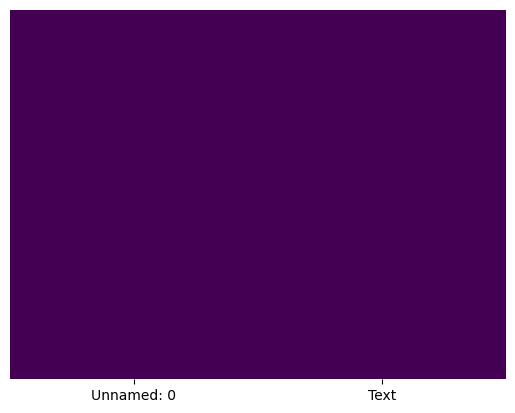

In [171]:
sns.heatmap(musk.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [172]:
# Checking for duplicates
musk.duplicated().sum()

0

In [174]:
# Removing Unnamed column
musk.drop(['Unnamed: 0'],inplace=True,axis=1)
musk

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [175]:
musk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    1999 non-null   object
dtypes: object(1)
memory usage: 15.7+ KB


In [176]:
musk.ndim

2

In [149]:
musk=musk['Text']
musk

0                                  @kunalb11 Im an alien
1       @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2                     @joerogan @Spotify Great interview!
3                         @gtera27 Doge is underestimated
4       @teslacn Congratulations Tesla China for amazi...
                              ...                        
1994    @flcnhvy True, it sounds so surreal, but the n...
1995    @PPathole Make sure to read ur terms &amp; con...
1996                  @TeslaGong @PPathole Samwise Gamgee
1997    @PPathole Altho Dumb and Dumber is <U+0001F525...
1998                            Progress update August 28
Name: Text, Length: 1999, dtype: object

In [178]:
# remove both the leading and the trailing characters
musk = [y.strip() for y in musk]
musk

['Text']

In [179]:
# removes empty strings, because they are considered in Python as False
musk = [x for x in musk if x] 
musk

['Text']

In [180]:
# Joining the list into one string/text
text = ' '.join(musk)
text

'Text'

In [181]:
# Punctuation
no_punc_text = text.translate(str.maketrans("\x92", "'", string.punctuation)) 
no_punc_text

'Text'

In [182]:
# Tokenization
text_tokens = word_tokenize(no_punc_text)
text_tokens

['Text']

In [183]:
len(text_tokens)

1

In [184]:
my_stop_words = stopwords.words('english')
my_stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [185]:
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:65])

['Text']


In [186]:
# Noramalize the data
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:45])

['text']


In [187]:
# Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40])

['text']


In [188]:
!python -m spacy download en_core_web_sm

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 12.8/12.8 MB 2.2 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [189]:
import spacy

In [190]:
# NLP english language model of spacy library
nlp = spacy.load('en_core_web_sm')

In [191]:
# lemmas being one of them, but mostly POS, which will follow later
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:40])

Text


In [192]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:22])

['text']


## Feature Extraction

In [193]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)

In [194]:
pd.DataFrame.from_records([vectorizer.vocabulary_])

,text
0,0


In [195]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T

,0
text,0


In [196]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0,ascending=False).head(30)

,0
text,0


In [197]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0,ascending=True).head(25)

,0
text,0


In [198]:
print(vectorizer.vocabulary_)

{'text': 0}


In [199]:
print(vectorizer.get_feature_names_out()[50:100])

[]


In [200]:
print(X.toarray()[50:100])

[]


In [201]:
print(X.toarray().shape)

(1, 1)


#### Let's see how can bigrams and trigrams can be included here

In [202]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',
                                         ngram_range=(1,4),
                                         max_features = 100)

bow_matrix_ngram = vectorizer_ngram_range.fit_transform(musk)
bow_matrix_ngram

<1x1 sparse matrix of type '<class 'numpy.int64'>'
	with 1 stored elements in Compressed Sparse Row format>

In [203]:
print(vectorizer_ngram_range.get_feature_names_out())

['text']


In [204]:
print(bow_matrix_ngram.toarray())

[[1]]


#### TFidf vectorizer :

In [205]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",
                                                 analyzer='word',
                                                 ngram_range=(1,4),
                                                 max_features = 100)

tf_idf_matrix_n_gram_max_features = vectorizer_n_gram_max_features.fit_transform(musk)

In [206]:
print(vectorizer_n_gram_max_features.get_feature_names_out())

['text']


In [207]:
print(tf_idf_matrix_n_gram_max_features.toarray())

[[1.]]


####  Generate wordcloud :

In [208]:
# Define a function to plot word cloud

def plot_cloud(wordcloud):
    plt.figure(figsize=(60, 40))    # Set figure size   
    plt.imshow(wordcloud)           # Display image    
    plt.axis("off")                 # No axis details

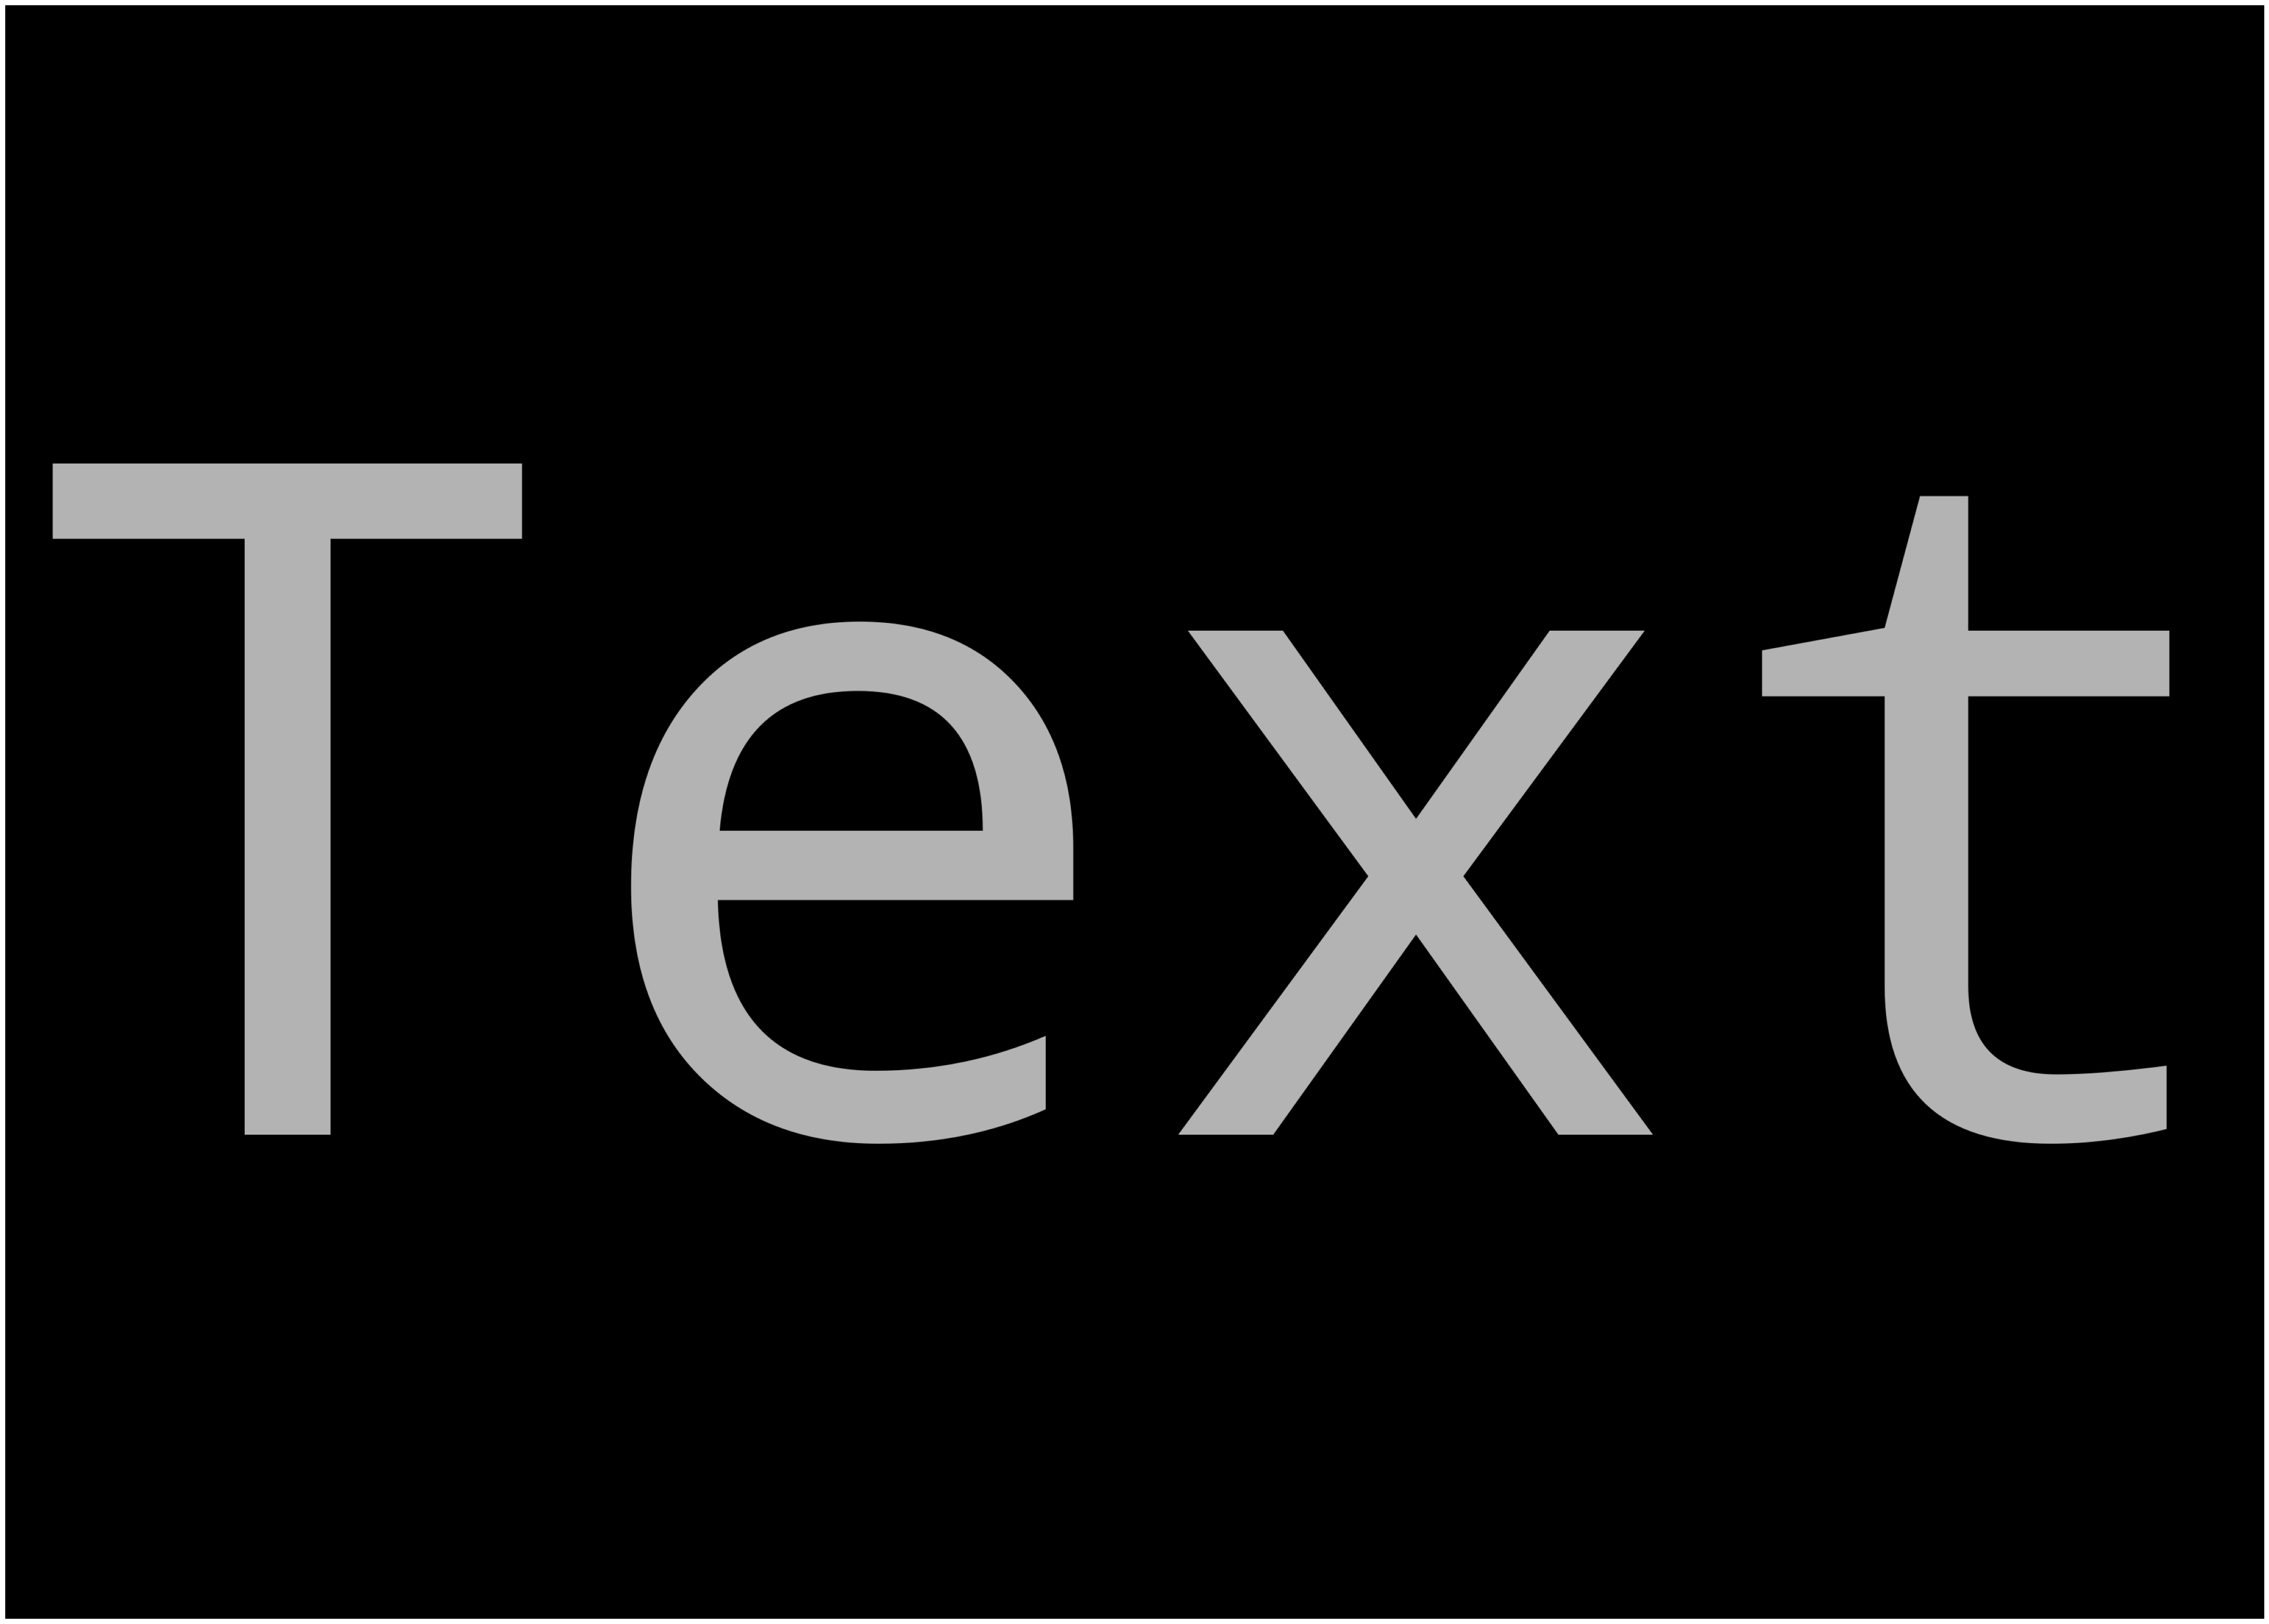

In [209]:
# Generate wordcloud
wordcloud = WordCloud(width = 3500, 
                      height = 2500,
                      background_color='black',
                      max_words=120,
                      colormap='Set2').generate(text)
# Plot
plot_cloud(wordcloud)

In [210]:
musk2 = pd.read_csv('Elon_musk.csv', encoding='ISO-8859-1')
musk2

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [211]:
musk2 = musk2['Text']
musk2

0                                  @kunalb11 Im an alien
1       @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2                     @joerogan @Spotify Great interview!
3                         @gtera27 Doge is underestimated
4       @teslacn Congratulations Tesla China for amazi...
                              ...                        
1994    @flcnhvy True, it sounds so surreal, but the n...
1995    @PPathole Make sure to read ur terms &amp; con...
1996                  @TeslaGong @PPathole Samwise Gamgee
1997    @PPathole Altho Dumb and Dumber is <U+0001F525...
1998                            Progress update August 28
Name: Text, Length: 1999, dtype: object

In [212]:
musk2 = [x.strip() for x in musk2] # remove both the leading and the trailing characters
musk2 = [x for x in musk2 if x] # removes empty strings, because they are considered in Python as False
musk2[0:10]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [213]:
one_block = musk2[1]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [214]:
one_block

'@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?'

In [215]:
for token in doc_block[:]:
    print(token, token.pos_)

@ID_AA_Carmack ADV
Ray PROPN
tracing VERB
on ADP
Cyberpunk PROPN
with ADP
HDR PROPN
is AUX
next ADJ
- PUNCT
level NOUN
. PUNCT
Have AUX
you PRON
tried VERB
it PRON
? PUNCT


In [216]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]

#print(nouns_verbs[5:25])
nouns_verbs

['tracing', 'level', 'tried']

In [217]:
len(nouns_verbs)

3

In [218]:
#Counting tokens again
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
X

<3x3 sparse matrix of type '<class 'numpy.int64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [219]:
X.shape

(3, 3)

In [220]:
X.toarray()

array([[0, 1, 0],
       [1, 0, 0],
       [0, 0, 1]], dtype=int64)

In [221]:
cv.get_feature_names_out()

array(['level', 'tracing', 'tried'], dtype=object)

In [222]:
#pd.DataFrame(X.toarray(), columns = sorted(cv.vocabulary_))
# Or
temp_df = pd.DataFrame(X.toarray(), columns = cv.get_feature_names_out())
temp_df

,level,tracing,tried
0,0,1,0
1,1,0,0
2,0,0,1


In [223]:
sum_words = X.sum(axis=0) #Column total
sum_words

matrix([[1, 1, 1]], dtype=int64)

In [224]:
type(sum_words)

numpy.matrix

In [225]:
cv.vocabulary_

{'tracing': 1, 'level': 0, 'tried': 2}

In [226]:
sorted(cv.vocabulary_)

['level', 'tracing', 'tried']

In [227]:
wf_df = pd.DataFrame({'word' : cv.get_feature_names_out(),
                      'count' : np.array(sum_words).flatten()})
wf_df

,word,count
0,level,1
1,tracing,1
2,tried,1


#### Visualizing results :

<Axes: title={'center': 'Top verbs and nouns'}, xlabel='word'>

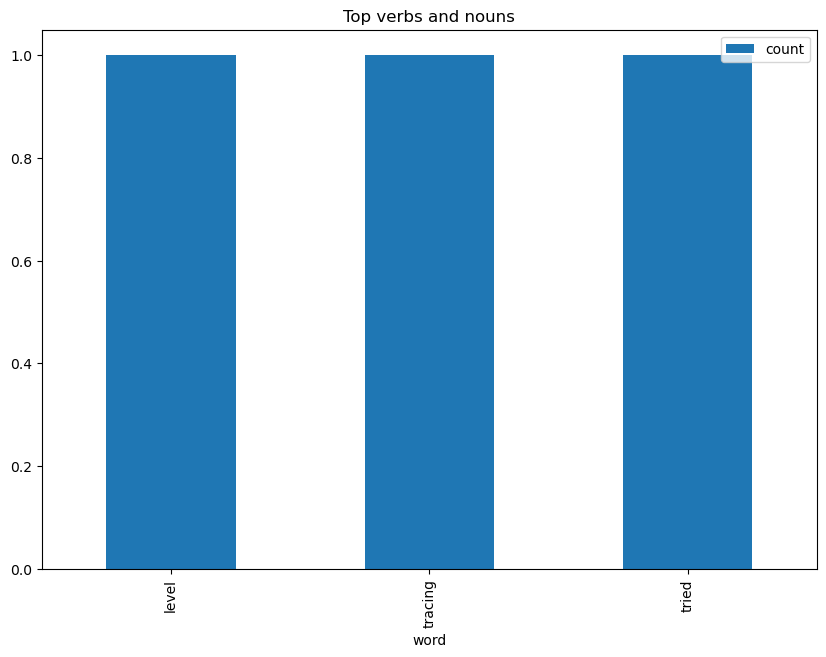

In [228]:
#Barchart for top 10 nouns + verbs
wf_df[0:15].plot.bar(x='word', figsize=(10,7), title='Top verbs and nouns')

## Emotion Mining :

In [229]:
#Sentiment analysis
data = pd.read_csv("Afinn.csv", encoding = 'ISO-8859-1')
data

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [230]:
from nltk import tokenize

sentences = tokenize.sent_tokenize(" ".join(musk2))

#sentences[5:15]
sentences

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [231]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
919,"@kenyanwalstreet Not actually a payout, just a..."
920,"It may never pay out, as the stock cant b ht..."
921,Details Aug 28.
922,AI symbiosis while u wait @vistacruiser7 @flcn...


In [232]:
affinity_scores = data.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [233]:
nlp = spacy.load('en_core_web_sm')

In [234]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        #print(sentence)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0) #return 0 if key not found
    return sent_score

In [235]:
# test that it works
calculate_sentiment(text = 'Amazing, wonderful session')

8

In [236]:
calculate_sentiment(text = 'wonderful session')

4

In [237]:
calculate_sentiment(text = 'great job, best explanation ever')

6

In [238]:
calculate_sentiment(text = 'good')

3

In [239]:
calculate_sentiment(text = 'What a ridiculous')

-3

In [240]:
calculate_sentiment(text = 'worst product and worst service ever')

-6

In [241]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [242]:
sent_df

,sentence,sentiment_value
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0
1,Have you tried it?,0
2,@joerogan @Spotify Great interview!,3
3,@gtera27 Doge is underestimated @teslacn Congr...,3
4,Now on to the next for even more!!,0
...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",0
920,"It may never pay out, as the stock cant b ht...",-4
921,Details Aug 28.,0
922,AI symbiosis while u wait @vistacruiser7 @flcn...,-2


In [243]:
sent_df.iloc[4,0]

'Now on to the next for even more!!'

In [244]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
#sent_df['word_count'].head(10)
sent_df

,sentence,sentiment_value,word_count
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13
1,Have you tried it?,0,4
2,@joerogan @Spotify Great interview!,3,4
3,@gtera27 Doge is underestimated @teslacn Congr...,3,13
4,Now on to the next for even more!!,0,8
...,...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",0,11
920,"It may never pay out, as the stock cant b ht...",-4,31
921,Details Aug 28.,0,3
922,AI symbiosis while u wait @vistacruiser7 @flcn...,-2,47


In [245]:
sent_df.sort_values(by='sentiment_value').tail(10)

,sentence,sentiment_value,word_count
817,Might be able to https://t.co/FB7e5nOq2E @Pri...,11,72
224,"@PPathole @karpathy For a second there, I thou...",11,69
159,@harsimranbansal @heydave7 It will most likely...,11,93
184,"Also, w https://t.co/IYdKttVsqk @cleantechnic...",12,98
645,Its https://t.co/IxhyT6NuiC @Teslarati Tesla...,13,65
81,@teslaownersSV This is a good one @MrBeastYT I...,13,38
585,The open areas https://t.co/rabjKrtQlw @Sav...,14,138
105,@Erdayastronaut @SpaceX Was also thinking that...,16,94
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",16,231
719,We just havent observed the https://t.co/mez...,17,72


In [246]:
sent_df.sort_values(by='sentiment_value').head(15)

,sentence,sentiment_value,word_count
647,Very ba https://t.co/tJsh1Exz1Q @justpaulinel...,-8,60
837,Cool Model 3 review by @iamjamiefoxx https://t...,-8,61
64,"Also, the road to hell is mostly paved with ba...",-7,11
920,"It may never pay out, as the stock cant b ht...",-4,31
680,"Occasional flights from land are ok, but frequ...",-4,39
611,"Then static fire, checkouts, static fire, fly ...",-4,12
729,Those worry me.,-3,3
718,That bs has been pushed by Eberhard (worst per...,-3,25
90,All three static fires completed &amp; no RUDs!,-3,8
630,You are a modern day moron.,-3,6


In [247]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    924.000000
mean       1.352814
std        2.692026
min       -8.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       17.000000
Name: sentiment_value, dtype: float64

In [248]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0].head()

,sentence,sentiment_value,word_count
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13
1,Have you tried it?,0,4
4,Now on to the next for even more!!,0,8
5,Happy New Year of the Ox!,0,6
6,https://t.co/9WFKMYu2oj Frodo was the underdog...,-2,14


In [249]:
sent_df[sent_df['sentiment_value']<-5]

,sentence,sentiment_value,word_count
64,"Also, the road to hell is mostly paved with ba...",-7,11
647,Very ba https://t.co/tJsh1Exz1Q @justpaulinel...,-8,60
837,Cool Model 3 review by @iamjamiefoxx https://t...,-8,61


In [250]:
sent_df[sent_df['sentiment_value']<-5].head()['sentence']

64     Also, the road to hell is mostly paved with ba...
647    Very ba
 https://t.co/tJsh1Exz1Q @justpaulinel...
837    Cool Model 3 review by @iamjamiefoxx https://t...
Name: sentence, dtype: object

In [251]:
sent_df[sent_df['sentiment_value']<-5].head()['sentence'].tolist()

['Also, the road to hell is mostly paved with bad intentions.',
 'Very ba\x85 https://t.co/tJsh1Exz1Q @justpaulinelol It\x92s too embarrassing Just learned that my physics prof from Penn is head of Fermilab &amp; still has some of my old homework <U+263A><U+FE0F> @ruskin147 It is unfortunately common for many in academia to overweight the value of ideas &amp; underweight bringing\x85 https://t.co/OFFoojCqNv @l_vaux @kulpability @tlowdon @EthicalSkeptic People are extremely unlikely to die of Covid/sars-cov2 alone.',
 'Cool Model 3 review by @iamjamiefoxx https://t.co/hJDD7BjkE3 @teslacn Tesla will add a power lift gate at no cost @HansNoordsij Agreed, hydrogen fool sells make no sense Pronouns suck @historyofarmani Also, we get our lithium from Australia @nichegamer <U+0001F923><U+0001F923> @akinfermo Yeah, would have been way better just to send everyone $6k I bet no one on <U+0001F339> Twitter even *has* a guillotine!']

In [252]:
sent_df[sent_df['sentiment_value']<-5].head()['sentence'].tolist()[0]

'Also, the road to hell is mostly paved with bad intentions.'

In [253]:
sent_df['index'] = range(0, len(sent_df))

<Axes: xlabel='sentiment_value', ylabel='Density'>

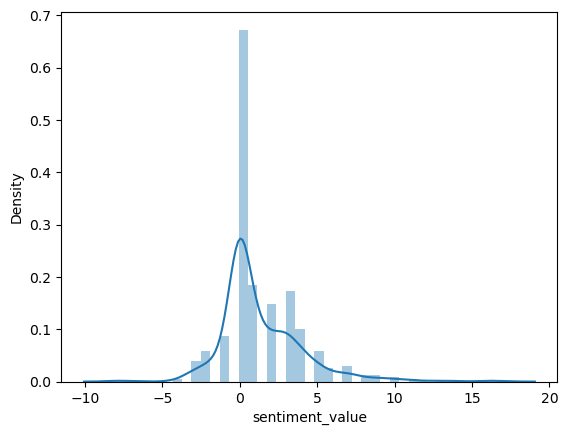

In [254]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value'])

<Axes: xlabel='index', ylabel='sentiment_value'>

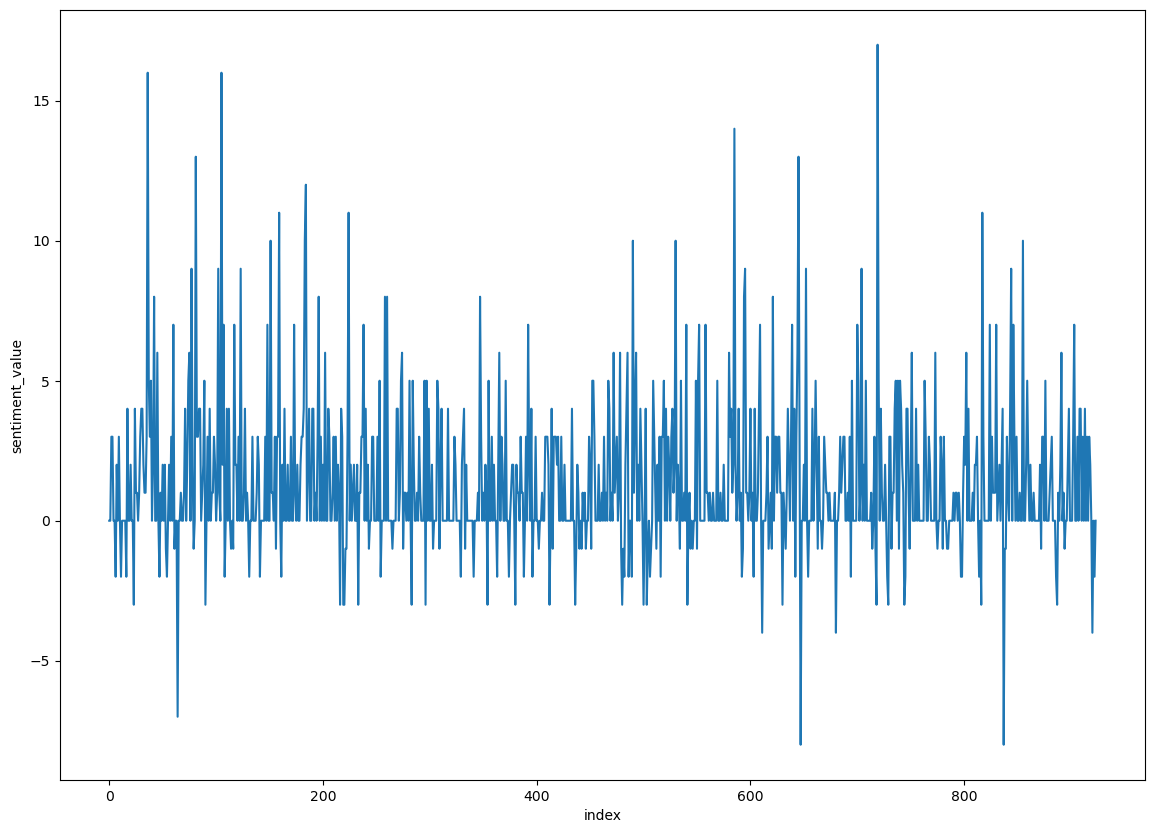

In [255]:
plt.figure(figsize=(14, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<Axes: title={'center': 'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

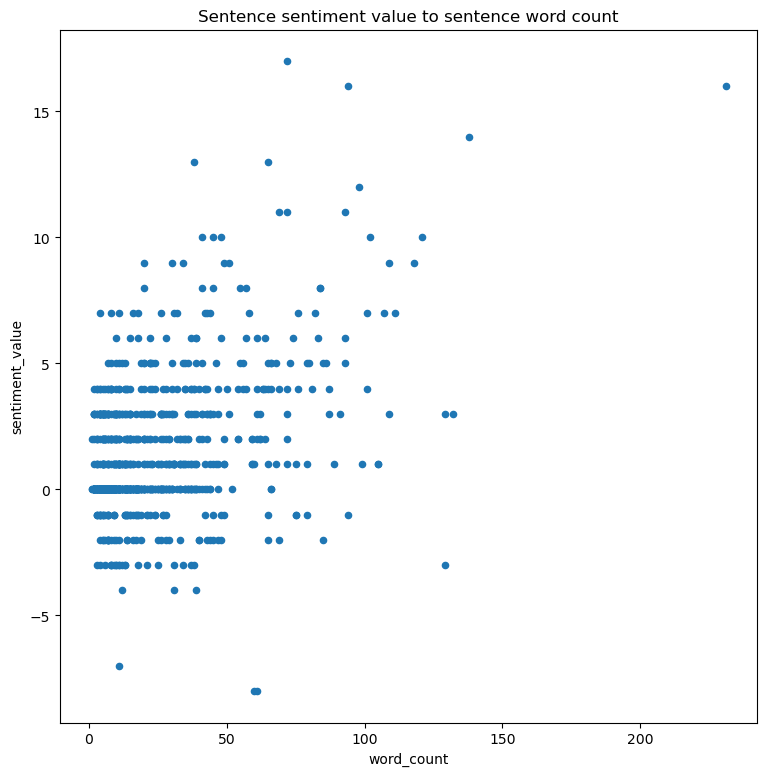

In [256]:
sent_df.plot.scatter(x='word_count',
                     y='sentiment_value',
                     figsize=(9,9),
                     title='Sentence sentiment value to sentence word count')

In [257]:
# PW for positive words 
# NW for Negative Words 

In [258]:
PW=pd.read_csv("positive-words.txt", on_bad_lines='skip')
PW

,;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
0,;
1,; Opinion Lexicon: Positive
2,;
3,; This file contains a list of POSITIVE opinio...
4,;
...,...
2026,youthful
2027,zeal
2028,zenith
2029,zest


In [259]:
NW=pd.read_csv("negative-words.txt", on_bad_lines ='skip', encoding='latin-1')
NW

,;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
0,;
1,; Opinion Lexicon: Negative
2,;
3,; This file contains a list of NEGATIVE opinio...
4,;
...,...
4803,zaps
4804,zealot
4805,zealous
4806,zealously


In [260]:
PW =PW.iloc[25:]
PW =PW.rename(columns={';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;':'Words'})
PW.reset_index(inplace=True)
PW =PW.drop('index',axis=1)
PW['Score'] = 1
PW

,Words,Score
0,a+,1
1,abound,1
2,abounds,1
3,abundance,1
4,abundant,1
...,...,...
2001,youthful,1
2002,zeal,1
2003,zenith,1
2004,zest,1


In [261]:
NW = NW.iloc[25:]
NW = NW.rename(columns={';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;':'Words'})
NW.reset_index(inplace=True)
NW = NW.drop('index',axis=1)
NW['Score'] = -1
NW

,Words,Score
0,2-faced,-1
1,2-faces,-1
2,abnormal,-1
3,abolish,-1
4,abominable,-1
...,...,...
4778,zaps,-1
4779,zealot,-1
4780,zealous,-1
4781,zealously,-1


In [262]:
affinity_scores1 = PW.set_index('Words')['Score'].to_dict()
affinity_scores2 = NW.set_index('Words')['Score'].to_dict()
affinity_scores1.update(affinity_scores2)
affinity_scores = affinity_scores1
affinity_scores

{'a+': 1,
 'abound': 1,
 'abounds': 1,
 'abundance': 1,
 'abundant': 1,
 'accessable': 1,
 'accessible': 1,
 'acclaim': 1,
 'acclaimed': 1,
 'acclamation': 1,
 'accolade': 1,
 'accolades': 1,
 'accommodative': 1,
 'accomodative': 1,
 'accomplish': 1,
 'accomplished': 1,
 'accomplishment': 1,
 'accomplishments': 1,
 'accurate': 1,
 'accurately': 1,
 'achievable': 1,
 'achievement': 1,
 'achievements': 1,
 'achievible': 1,
 'acumen': 1,
 'adaptable': 1,
 'adaptive': 1,
 'adequate': 1,
 'adjustable': 1,
 'admirable': 1,
 'admirably': 1,
 'admiration': 1,
 'admire': 1,
 'admirer': 1,
 'admiring': 1,
 'admiringly': 1,
 'adorable': 1,
 'adore': 1,
 'adored': 1,
 'adorer': 1,
 'adoring': 1,
 'adoringly': 1,
 'adroit': 1,
 'adroitly': 1,
 'adulate': 1,
 'adulation': 1,
 'adulatory': 1,
 'advanced': 1,
 'advantage': 1,
 'advantageous': 1,
 'advantageously': 1,
 'advantages': 1,
 'adventuresome': 1,
 'adventurous': 1,
 'advocate': 1,
 'advocated': 1,
 'advocates': 1,
 'affability': 1,
 'affable'

In [263]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        #print(sentence)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0) #return 0 if key not found
    return sent_score

In [264]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [265]:
sent_df

,sentence,sentiment_value,word_count,index
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13,0
1,Have you tried it?,0,4,1
2,@joerogan @Spotify Great interview!,1,4,2
3,@gtera27 Doge is underestimated @teslacn Congr...,0,13,3
4,Now on to the next for even more!!,0,8,4
...,...,...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",0,11,919
920,"It may never pay out, as the stock cant b ht...",-1,31,920
921,Details Aug 28.,0,3,921
922,AI symbiosis while u wait @vistacruiser7 @flcn...,0,47,922


In [266]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df

,sentence,sentiment_value,word_count,index
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13,0
1,Have you tried it?,0,4,1
2,@joerogan @Spotify Great interview!,1,4,2
3,@gtera27 Doge is underestimated @teslacn Congr...,0,13,3
4,Now on to the next for even more!!,0,8,4
...,...,...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",0,11,919
920,"It may never pay out, as the stock cant b ht...",-1,31,920
921,Details Aug 28.,0,3,921
922,AI symbiosis while u wait @vistacruiser7 @flcn...,0,47,922


In [267]:
sent_df.sort_values(by='sentiment_value').tail()

,sentence,sentiment_value,word_count,index
299,It was designed from the beginning with human ...,5,64,299
123,It isnt enough to be safer than human drivers...,5,51,123
105,@Erdayastronaut @SpaceX Was also thinking that...,6,94,105
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",7,231,36
652,"Its not useful for predicting the future, nor...",9,118,652


In [268]:
sent_df.sort_values(by='sentiment_value').head()

,sentence,sentiment_value,word_count,index
647,Very ba https://t.co/tJsh1Exz1Q @justpaulinel...,-5,60,647
762,A full blown Starship and SuperHeavy will be h...,-3,36,762
363,4D is essential for dynamically occluded objec...,-3,45,363
886,This is primarily an electrical/electronic (ch...,-3,69,886
156,We couldnt get everything done in https://t....,-3,65,156


In [269]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    924.000000
mean       0.451299
std        1.241573
min       -5.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        9.000000
Name: sentiment_value, dtype: float64

In [270]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<0].head()

,sentence,sentiment_value,word_count,index
6,https://t.co/9WFKMYu2oj Frodo was the underdog...,-1,14,6
11,"However, if we don https://t.co/9Z8Ac6skqx @R...",-1,40,11
16,Thats what youre missing.,-1,4,16
23,https://t.co/UEEocOfcTb The people have spoken...,-1,37,23
30,The Second Last Kingdom https://t.co/Je4EI88Hm...,-1,38,30


In [271]:
sent_df[sent_df['sentiment_value']<-1]

,sentence,sentiment_value,word_count,index
55,You https://t.co/6gO7EHq9qy @avalonpenrose A ...,-2,30,55
64,"Also, the road to hell is mostly paved with ba...",-2,11,64
156,We couldnt get everything done in https://t....,-3,65,156
219,@RGVaerialphotos It will be real soon @MarcusH...,-2,18,219
220,External https://t.co/csIZk6sEVu @bcart03 @ne...,-2,31,220
240,@RationalEtienne @ShyCybertruck Fate loves iro...,-2,42,240
296,"No symptoms for past few days, apart from fati...",-2,9,296
304,"Last week, I had sym https://t.co/gL0mhrqJxY ...",-2,41,304
329,"Their main PCR search is for the N1 gene, uniq...",-2,28,329
363,4D is essential for dynamically occluded objec...,-3,45,363


In [272]:
sent_df[sent_df['sentiment_value']<-1].head(20)['sentence']

55     You
 https://t.co/6gO7EHq9qy @avalonpenrose A ...
64     Also, the road to hell is mostly paved with ba...
156    We couldnt get everything done in
 https://t....
219    @RGVaerialphotos It will be real soon @MarcusH...
220    External
 https://t.co/csIZk6sEVu @bcart03 @ne...
240    @RationalEtienne @ShyCybertruck Fate loves iro...
296    No symptoms for past few days, apart from fati...
304    Last week, I had sym
 https://t.co/gL0mhrqJxY ...
329    Their main PCR search is for the N1 gene, uniq...
363    4D is essential for dynamically occluded objec...
374    The Model 3 ramp was extreme stress &amp; pa
 ...
391    Transferring propellant
 https://t.co/vPIIPpDV...
436    @SpaceX Just a small-seeming issue with loss o...
525    Hollywood should just start with the sequel &a...
564    @podcastnotes Genetic engineering is too slow ...
611    Then static fire, checkouts, static fire, fly ...
642    Its when you hang out there that problems arise.
647    Very ba
 https://t.co/tJ

In [273]:
sent_df[sent_df['sentiment_value']<-1].head(5)['sentence'].tolist()

['You\x85 https://t.co/6gO7EHq9qy @avalonpenrose A hedge fund that shorts is a shrubbery @lafebra @Gfilche https://t.co/M0WwQSTAXm @lafebra @Gfilche Yeah, also a rear screen 0 to 155mph trap speed in a 1/4 mile.',
 'Also, the road to hell is mostly paved with bad intentions.',
 'We couldn\x92t get everything done in\x85 https://t.co/7HkZA1OhE4 @westcoastbill The writing on Cobra Kai is sick<U+0001F44C> @AfloatHickory Haha I will save you the nightmare of seeing me in those shorts @h3_extrachars You can upload custom music/sounds @jgrano305 Unfortunately, pedestrian speaker is needed, otherwise no external sound generator except actual horn Change your horn sound to <U+0001F410>, <U+0001F40D><U+0001F3B7>, <U+0001F4A8> or holiday jingles with latest Tesla software update!',
 '@RGVaerialphotos It will be real soon @MarcusHouseGame @bcart03 @nextspaceflight @NASASpaceflight Starship legs are one of the hardest problems.',
 'External\x85 https://t.co/csIZk6sEVu @bcart03 @nextspaceflight @NA

In [274]:
sent_df['index'] = range(0, len(sent_df))

<Axes: xlabel='sentiment_value', ylabel='Density'>

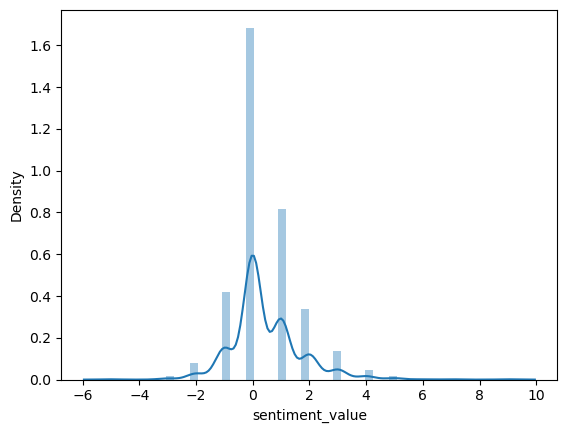

In [275]:
sns.distplot(sent_df['sentiment_value'])

<Axes: xlabel='index', ylabel='sentiment_value'>

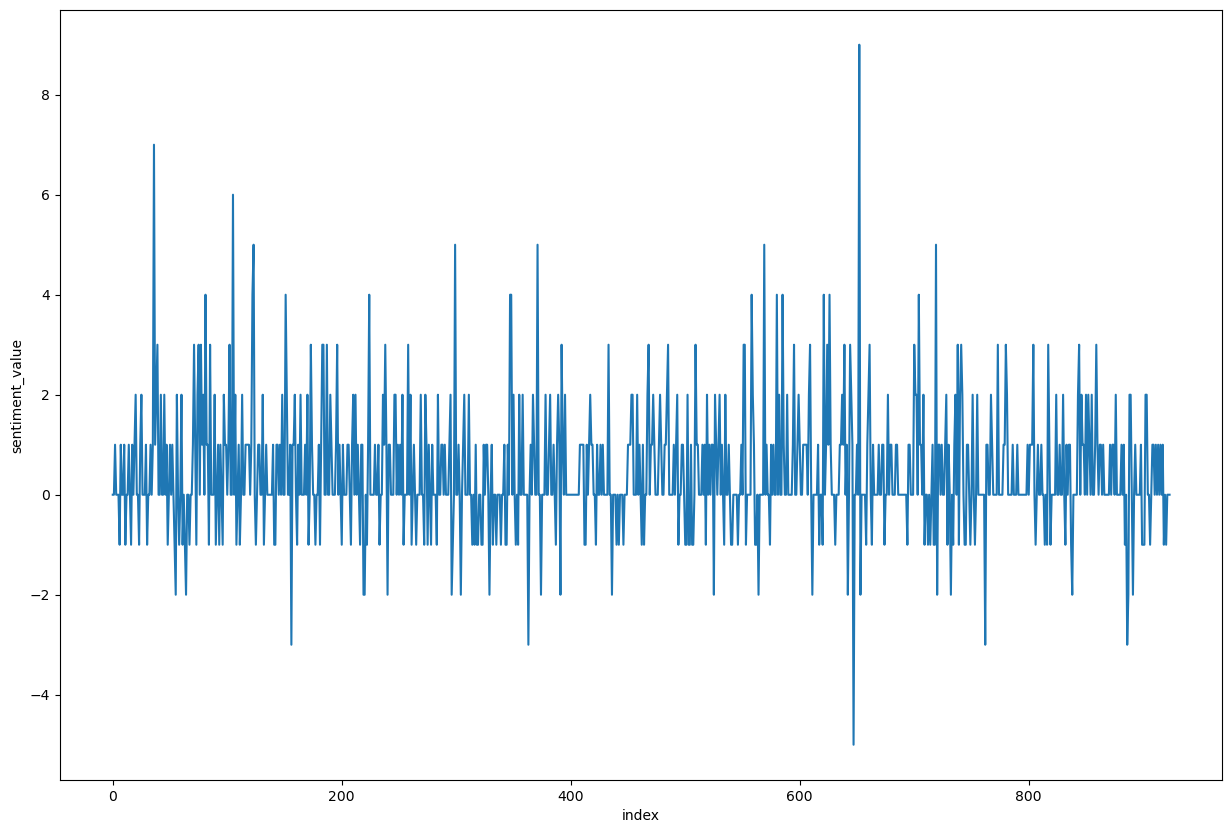

In [276]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<Axes: title={'center': 'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

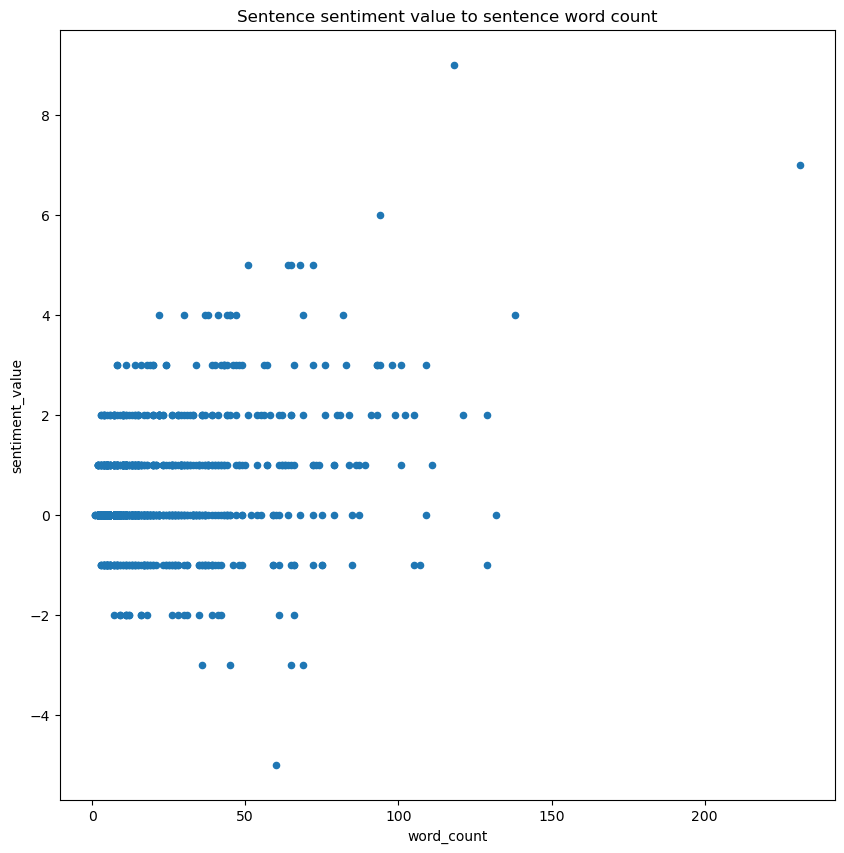

In [277]:
sent_df.plot.scatter(x='word_count',
                     y='sentiment_value',
                     figsize=(10,10),
                     title='Sentence sentiment value to sentence word count')

In [278]:
# NLP english language model of spacy library
nlp = spacy

In [279]:
spacy

<module 'spacy' from 'C:\\Users\\HP\\AppData\\Roaming\\Python\\Python310\\site-packages\\spacy\\__init__.py'>